In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("LM_Channel_5200_mean_prof.txt", sep=r'\s+', comment='%')
df

,y_over_delta,y_plus,U,dU_dy,W,P
0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00
1,0.000014,0.071102,0.071102,0.999986,-0.000011,-4.717272e-09
2,0.000042,0.216250,0.216244,0.999947,-0.000034,-3.851045e-07
3,0.000085,0.438384,0.438355,0.999819,-0.000069,-6.055743e-06
4,0.000143,0.740447,0.740306,0.999379,-0.000117,-4.477271e-05
...,...,...,...,...,...,...
763,0.991022,5139.336002,26.574682,0.000026,-0.006544,-4.790325e-01
764,0.993017,5149.682732,26.574923,0.000020,-0.006553,-4.789895e-01
765,0.995012,5160.029605,26.575104,0.000015,-0.006562,-4.789556e-01
766,0.997007,5170.376581,26.575224,0.000009,-0.006568,-4.789319e-01


Here:
-   y_over_delta: $y/\delta$ Grid point in wall-normal direction, Normalized by channel half width 
-   y_plus    : Grid point in wall-normal direction 
-   U       : Mean profile of streamwise velocity (normalized with $u^*$)
- dU/dy     : Derivative of U in wall-normal direction 
-   W       : Mean profile of spanwise velocity 
-   P       : Mean profile of pressure 

/home/avmo/.pyenv/versions/3.8.5/envs/snek/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


y0 = 0.17763933359513495


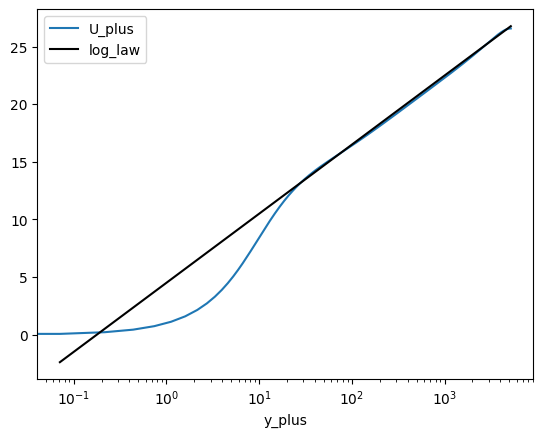

In [2]:
kappa = 0.384
u_star = 1.
B = 4.5
y0 = np.exp(-kappa * B)
df["U_plus"] = df.U / u_star
df["log_law"] = np.log(df.y_plus / y0) / kappa

# Plot
ax = df.plot("y_plus", "U_plus")
df.plot("y_plus", "log_law", ax=ax, color="k")

ax.set(xscale="log")
print(f"{y0 = }")

In [8]:
y0 / df.y_plus.max()

3.4288517720901714e-05

# The indicator function

Theoretically $$\frac{\partial U^+}{\partial y^+} = \frac{1}{\kappa y^+}$$ in the log-law region to check this we use the indicator function $$\beta (y^+) = y^+ \frac{\partial U^+}{\partial y^+}$$

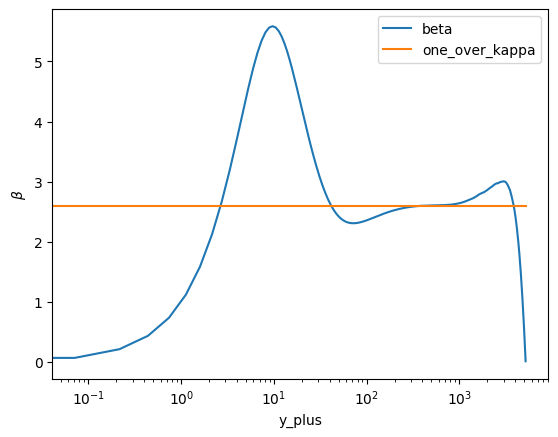

In [5]:
df["beta"] = df.y_plus * df.dU_dy
df["one_over_kappa"] = 1 / kappa

ax = df.plot("y_plus", "beta")
df.plot("y_plus", "one_over_kappa", ax=ax)
ax.set(ylabel=r"$\beta$", xscale="log")
ax.legend()